In [2]:
!pip install wandb --quiet
!pip install pandas --quiet
!pip install pyarrow --quiet
!pip install matplotlib --quiet
!pip install plotly --quiet

You should consider upgrading via the 'c:\users\yentl creyf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\yentl creyf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\yentl creyf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\yentl creyf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\yentl creyf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import wandb

wandb.login()


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: extreme4all (bot-detector). Use `wandb login --relogin` to force relogin


True

In [4]:
import pandas as pd

df = pd.read_parquet("data/2022-10-26_hiscore_data.parquet.gzip")
df.head()


,name,created_at,updated_at,possible_ban,confirmed_ban,label_id,label,account_status,id,timestamp,...,tombs_of_amascut,tombs_of_amascut_expert,tzkal_zuk,tztok_jad,venenatis,vetion,vorkath,wintertodt,zalcano,zulrah
0,3BA604236FB0319D5937E31388B0C64C,2021-03-14 20:22:45,2022-10-26 01:01:21,0,0,1,Real_Player,not banned,59568395,2022-10-26 01:04:13,...,0,0,0,0,0,0,0,0,0,0
1,5A02B5A7F38AD2623A9C5E68DF01EC2F,2021-03-14 20:42:37,2022-10-26 08:11:05,0,0,1,Real_Player,not banned,59622273,2022-10-26 08:16:02,...,0,0,0,10,0,0,114,73,0,1256
2,E666957B20A95519E6306D75FEC4DE19,2021-03-14 22:17:40,2022-10-26 04:14:28,1,0,1,Real_Player,not banned,59615490,2022-07-27 06:41:21,...,0,0,0,20,0,0,1000,500,0,400
3,02726CE8822537806154B747927223D0,2021-03-14 22:18:40,2022-10-26 01:34:01,0,0,1,Real_Player,not banned,58905027,2022-10-26 01:34:05,...,0,0,0,0,0,0,3956,204,1068,0
4,A5ECC15B4DFBFCAEF1522D4D78150146,2021-03-14 22:19:32,2022-10-26 15:53:38,0,0,1,Real_Player,not banned,59215937,2022-10-26 15:53:45,...,0,0,0,0,0,0,0,115,0,0


In [5]:
SKILLS = [
    "attack",
    "defence",
    "strength",
    "hitpoints",
    "ranged",
    "prayer",
    "magic",
    "cooking",
    "woodcutting",
    "fletching",
    "fishing",
    "firemaking",
    "crafting",
    "smithing",
    "mining",
    "herblore",
    "agility",
    "thieving",
    "slayer",
    "farming",
    "runecraft",
    "hunter",
    "construction",
]
MINIGAMES = [
    "league",
    "bounty_hunter_hunter",
    "bounty_hunter_rogue",
    "cs_all",
    "cs_beginner",
    "cs_easy",
    "cs_medium",
    "cs_hard",
    "cs_elite",
    "cs_master",
    "lms_rank",
    "soul_wars_zeal",
]
BOSSES = [
    "abyssal_sire",
    "alchemical_hydra",
    "barrows_chests",
    "bryophyta",
    "callisto",
    "cerberus",
    "chambers_of_xeric",
    "chambers_of_xeric_challenge_mode",
    "chaos_elemental",
    "chaos_fanatic",
    "commander_zilyana",
    "corporeal_beast",
    "crazy_archaeologist",
    "dagannoth_prime",
    "dagannoth_rex",
    "dagannoth_supreme",
    "deranged_archaeologist",
    "general_graardor",
    "giant_mole",
    "grotesque_guardians",
    "hespori",
    "kalphite_queen",
    "king_black_dragon",
    "kraken",
    "kreearra",
    "kril_tsutsaroth",
    "mimic",
    "nex",
    "nightmare",
    "phosanis_nightmare",
    "obor",
    "sarachnis",
    "scorpia",
    "skotizo",
    "Tempoross",
    "the_gauntlet",
    "the_corrupted_gauntlet",
    "theatre_of_blood",
    "theatre_of_blood_hard",
    "thermonuclear_smoke_devil",
    "tombs_of_amascut",
    "tombs_of_amascut_expert",
    "tzkal_zuk",
    "tztok_jad",
    "venenatis",
    "vetion",
    "vorkath",
    "wintertodt",
    "zalcano",
    "zulrah",
]
HISCORE_COLUMNS = ["total"] + SKILLS + MINIGAMES + BOSSES


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223558 entries, 0 to 223557
Data columns (total 98 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   name                              223558 non-null  object        
 1   created_at                        223558 non-null  datetime64[ns]
 2   updated_at                        223558 non-null  datetime64[ns]
 3   possible_ban                      223558 non-null  int64         
 4   confirmed_ban                     223558 non-null  int64         
 5   label_id                          223558 non-null  int64         
 6   label                             223558 non-null  object        
 7   account_status                    223558 non-null  object        
 8   id                                223558 non-null  int64         
 9   timestamp                         223558 non-null  datetime64[ns]
 10  ts_date                         

In [7]:
import numpy as np

# bool_ 	Boolean (True or False) stored as a byte
# int_ 	Default integer type (same as C long; normally either int64 or int32)
# intc 	Identical to C int (normally int32 or int64)
# intp 	Integer used for indexing (same as C ssize_t; normally either int32 or int64)
# int8 	Byte (-128 to 127)
# int16 	Integer (-32768 to 32767)
# int32 	Integer (-2147483648 to 2147483647)
# int64 	Integer (-9223372036854775808 to 9223372036854775807)
# uint8 	Unsigned integer (0 to 255)
# uint16 	Unsigned integer (0 to 65535)
# uint32 	Unsigned integer (0 to 4294967295)
# uint64 	Unsigned integer (0 to 18446744073709551615)
# float_ 	Shorthand for float64.
# float16 	Half precision float: sign bit, 5 bits exponent, 10 bits mantissa
# float32 	Single precision float: sign bit, 8 bits exponent, 23 bits mantissa
# float64 	Double precision float: sign bit, 11 bits exponent, 52 bits mantissa

df['total'] = df['total'].astype('int32')
df[SKILLS] = df[SKILLS].astype('int32')
df[MINIGAMES] = df[MINIGAMES].astype('int16')
df[BOSSES] = df[BOSSES].astype('int16')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223558 entries, 0 to 223557
Data columns (total 98 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   name                              223558 non-null  object        
 1   created_at                        223558 non-null  datetime64[ns]
 2   updated_at                        223558 non-null  datetime64[ns]
 3   possible_ban                      223558 non-null  int64         
 4   confirmed_ban                     223558 non-null  int64         
 5   label_id                          223558 non-null  int64         
 6   label                             223558 non-null  object        
 7   account_status                    223558 non-null  object        
 8   id                                223558 non-null  int64         
 9   timestamp                         223558 non-null  datetime64[ns]
 10  ts_date                         

<AxesSubplot: xlabel='account_status'>

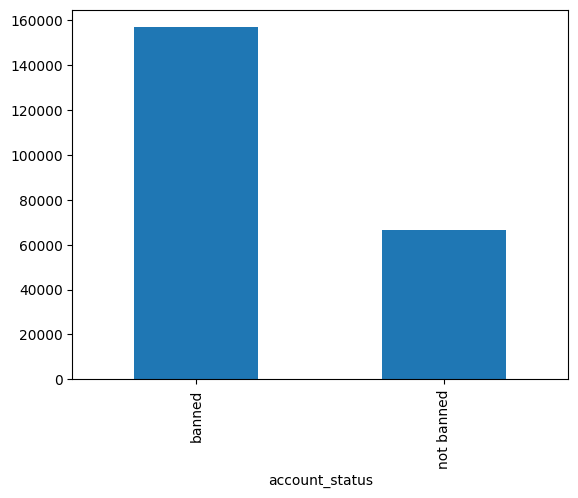

In [9]:
df.groupby(by=["account_status"]).count().sort_values(by=["name"], ascending=False)[
    "name"
].plot(kind="bar")


<AxesSubplot: xlabel='label,account_status'>

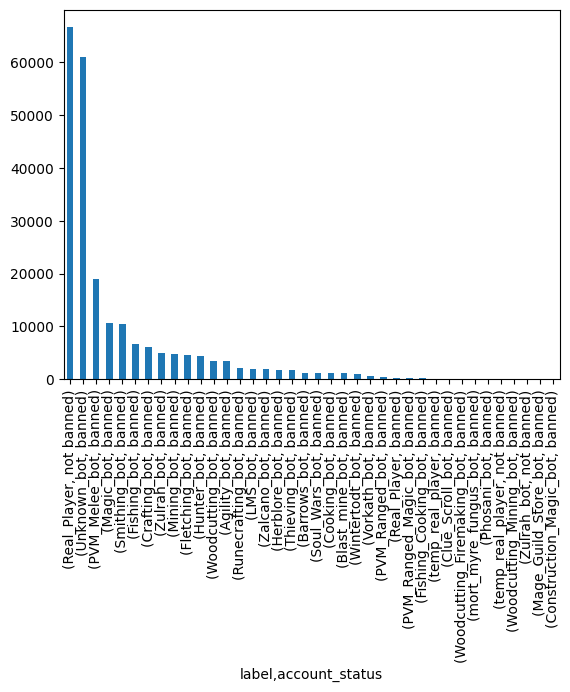

In [10]:
df.groupby(by=["label", "account_status"]).count().sort_values(
    by=["name"], ascending=False
)["name"].plot(kind="bar")


In [11]:
df.query("account_status=='banned'")[SKILLS].describe().round(1)


,attack,defence,strength,hitpoints,ranged,prayer,magic,cooking,woodcutting,fletching,...,smithing,mining,herblore,agility,thieving,slayer,farming,runecraft,hunter,construction
count,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,...,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0
mean,1373352.5,1325916.0,1689276.5,2177785.8,1820810.5,145867.8,1300553.1,364187.1,222313.7,323031.9,...,460968.6,709172.0,93210.8,239888.4,456340.7,109603.4,78050.1,289898.1,545078.3,59479.7
std,4951815.2,4807119.3,5441821.3,6489773.2,7776075.4,539651.7,4797867.0,4051797.0,1277309.0,2389550.7,...,2423245.0,4031334.8,894720.6,1127186.4,5426000.5,732295.5,665663.1,2658793.0,4365400.6,375075.9
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1184.0,1.0,977.5,5421.0,12.0,0.0,9.0,70.0,50.0,0.0,...,18.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,38187.0,36055.0,38363.0,65141.0,24.0,7861.0,28220.0,1780.0,23725.0,0.0,...,1168.0,2700.0,0.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,524557.0,634939.5,738887.5,1160502.0,226674.0,69777.0,786525.5,72760.0,119765.0,13939.5,...,41316.0,109719.5,4656.5,112041.0,8712.0,4572.0,50.0,1000.0,1000.0,795.5
max,165979627.0,200000000.0,200000000.0,200000000.0,200000000.0,48620170.0,200000000.0,200000000.0,200000000.0,200000000.0,...,200000000.0,158155640.0,80021515.0,120473430.0,200000000.0,128392614.0,96146333.0,200000000.0,200000000.0,57039247.0


In [12]:
df.query("account_status!='banned'")[SKILLS].describe().round(1)

,attack,defence,strength,hitpoints,ranged,prayer,magic,cooking,woodcutting,fletching,...,smithing,mining,herblore,agility,thieving,slayer,farming,runecraft,hunter,construction
count,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,...,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0
mean,9172410.8,7700936.4,14706299.8,18895645.1,17859867.8,4289233.1,9964659.6,7929788.7,5392823.8,5085018.6,...,3808984.7,3928176.1,4062074.6,3234833.0,4272522.2,6603188.1,7587615.9,3224611.2,3671633.1,3422131.3
std,13320453.3,10981023.1,23400766.0,26022613.8,26892981.0,7468194.8,12968006.1,18111532.6,11237103.6,9685938.3,...,8956047.0,7491766.2,7854814.3,6716579.7,9913950.3,9904516.6,14759723.6,7103771.3,8193147.7,6240678.9
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,749201.0,626762.5,1129505.0,1342420.0,1017510.0,166637.5,881610.5,701777.0,386546.0,209034.5,...,148186.5,302425.5,66658.5,259274.0,138612.5,161809.5,44142.5,22289.0,24285.5,44534.5
50%,3675598.0,3260804.0,7277931.0,8664874.0,6625355.0,1475780.0,5758883.0,2868394.0,1471995.0,1659699.0,...,1069368.0,1240799.0,1008742.0,1032519.0,950121.0,2350339.0,2219957.0,419564.0,827234.0,1113979.0
75%,14517717.5,13733125.5,16978172.0,27321587.0,23506072.5,6523921.0,15200193.0,13065789.5,6848894.5,9377912.0,...,4426663.0,4108354.0,5633266.0,3337404.5,5930024.5,10947351.0,13176979.0,3602273.5,3598869.0,3358560.5
max,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0,...,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0,200000000.0


In [13]:
df.query("account_status=='banned'")[MINIGAMES].describe().round(1)

,league,bounty_hunter_hunter,bounty_hunter_rogue,cs_all,cs_beginner,cs_easy,cs_medium,cs_hard,cs_elite,cs_master,lms_rank,soul_wars_zeal
count,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0
mean,0.0,1.1,0.2,3.9,0.3,0.3,2.7,0.5,0.1,0.1,61.2,76.0
std,0.0,25.6,9.0,138.9,5.8,6.7,141.4,11.1,3.6,4.0,458.2,1281.8
min,0.0,0.0,0.0,-19485.0,0.0,0.0,-24565.0,0.0,0.0,0.0,-26244.0,-32712.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,3226.0,2281.0,20503.0,1874.0,1413.0,20503.0,2077.0,509.0,1158.0,27241.0,32400.0


In [14]:
df.query("account_status!='banned'")[MINIGAMES].describe().round(1)

,league,bounty_hunter_hunter,bounty_hunter_rogue,cs_all,cs_beginner,cs_easy,cs_medium,cs_hard,cs_elite,cs_master,lms_rank,soul_wars_zeal
count,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0
mean,0.0,6.9,2.7,245.2,20.8,39.1,75.2,73.2,19.9,19.1,183.6,312.7
std,0.0,105.5,38.5,665.1,87.8,218.2,314.4,204.9,50.7,67.0,838.0,1792.1
min,0.0,0.0,0.0,-32213.0,0.0,0.0,-31226.0,0.0,0.0,0.0,-32576.0,-32587.0
25%,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,42.0,2.0,3.0,7.0,8.0,1.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,242.0,9.0,16.0,48.0,84.0,16.0,7.0,0.0,0.0
max,0.0,10683.0,5405.0,30622.0,3963.0,15559.0,16409.0,30300.0,1500.0,4068.0,31706.0,32721.0


In [15]:
df.query("account_status=='banned'")[BOSSES].describe().round(1)


,abyssal_sire,alchemical_hydra,barrows_chests,bryophyta,callisto,cerberus,chambers_of_xeric,chambers_of_xeric_challenge_mode,chaos_elemental,chaos_fanatic,...,tombs_of_amascut,tombs_of_amascut_expert,tzkal_zuk,tztok_jad,venenatis,vetion,vorkath,wintertodt,zalcano,zulrah
count,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,...,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0,156967.0
mean,0.5,2.4,15.4,0.5,4.2,1.3,4.5,0.1,0.2,0.2,...,0.0,0.0,0.0,0.0,6.6,1.2,88.3,8.5,46.1,137.0
std,24.4,128.6,254.3,5.8,89.5,83.3,76.3,5.6,7.4,9.1,...,0.7,0.9,0.2,0.8,126.2,29.0,1043.5,138.8,529.9,1201.7
min,0.0,0.0,0.0,0.0,0.0,-25197.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-32599.0,0.0,0.0,-32330.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3195.0,22260.0,18171.0,454.0,18229.0,6623.0,6300.0,1050.0,1177.0,1814.0,...,239.0,247.0,63.0,134.0,22172.0,4675.0,32724.0,11692.0,31062.0,32320.0


In [16]:
df.query("account_status!='banned'")[BOSSES].describe().round(1)


,abyssal_sire,alchemical_hydra,barrows_chests,bryophyta,callisto,cerberus,chambers_of_xeric,chambers_of_xeric_challenge_mode,chaos_elemental,chaos_fanatic,...,tombs_of_amascut,tombs_of_amascut_expert,tzkal_zuk,tztok_jad,venenatis,vetion,vorkath,wintertodt,zalcano,zulrah
count,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,...,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0,66591.0
mean,145.4,340.7,142.7,5.3,39.8,320.9,147.7,24.0,28.5,25.3,...,11.2,5.4,0.6,5.1,54.9,24.5,322.8,195.4,62.8,491.3
std,455.8,962.7,313.8,34.4,244.9,907.7,408.2,113.4,105.6,113.0,...,38.1,32.2,5.4,15.1,330.7,201.1,904.1,371.8,258.6,1383.2
min,0.0,-25626.0,0.0,0.0,0.0,-21060.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-23045.0,0.0,0.0,-32520.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0
75%,0.0,59.0,157.0,0.0,0.0,184.0,54.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,310.0,294.0,0.0,312.0
max,16675.0,29742.0,17924.0,5919.0,11628.0,30400.0,14287.0,3675.0,5470.0,5555.0,...,1063.0,1159.0,353.0,724.0,16922.0,10577.0,30000.0,15503.0,9634.0,30000.0


In [17]:
!pip install sklearn --quiet

You should consider upgrading via the 'c:\users\yentl creyf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [19]:
df['account_status'].unique()

array(['not banned', 'banned'], dtype=object)

In [24]:
x = df[HISCORE_COLUMNS].fillna(0)
y = df['account_status']

model = RandomForestClassifier(
    n_jobs=-1, verbose=1
)

In [21]:
model.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.4s finished


RandomForestClassifier(n_jobs=-1, verbose=1)

In [30]:
N_FOLDS = 3

features = {
    "max_depth": [1, 5, 10, 20, 40],
}

clf = GridSearchCV(
    model, 
    features, 
    cv=N_FOLDS, 
    n_jobs=-1, 
    verbose=2
)

clf.fit(x, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.5s finished


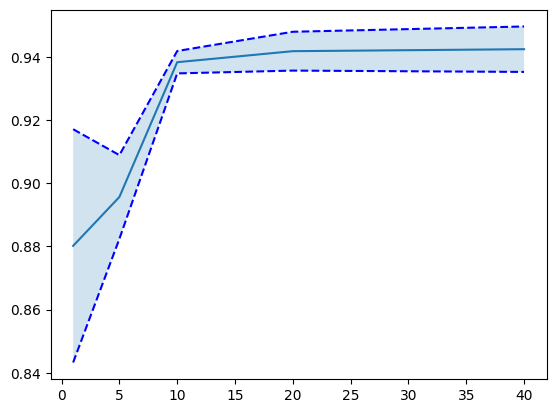

In [31]:
feature = features.get("max_depth")

plt.plot(feature, scores)

std_error = scores_std / np.sqrt(N_FOLDS)
plt.plot(feature, scores + std_error, "b--")
plt.plot(feature, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(
    feature, 
    scores + std_error, 
    scores - std_error, 
    alpha=0.2
)

plt.show()

In [ ]:
N_FOLDS = 3

features = {
    "n_estimators": [100, 200, 500],
}
features.update(clf.best_params_)

clf = GridSearchCV(
    model, 
    features, 
    cv=N_FOLDS, 
    n_jobs=-1, 
    verbose=2
)

clf.fit(x, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]